In [20]:
import pandas as pd

# Correct relative path
df = pd.read_csv('../data/diagnoses_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45055 entries, 0 to 45054
Data columns (total 95 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 45055 non-null  object
 1   Dx_10370003        45055 non-null  bool  
 2   Dx_106068003       45055 non-null  bool  
 3   Dx_111288001       45055 non-null  bool  
 4   Dx_11157007        45055 non-null  bool  
 5   Dx_111975006       45055 non-null  bool  
 6   Dx_13640000        45055 non-null  bool  
 7   Dx_164865005       45055 non-null  bool  
 8   Dx_164873001       45055 non-null  bool  
 9   Dx_164889003       45055 non-null  bool  
 10  Dx_164890007       45055 non-null  bool  
 11  Dx_164896001       45055 non-null  bool  
 12  Dx_164909002       45055 non-null  bool  
 13  Dx_164912004       45055 non-null  bool  
 14  Dx_164917005       45055 non-null  bool  
 15  Dx_164930006       45055 non-null  bool  
 16  Dx_164931005       45055 non-null  bool 

## Plotting frequency of each disease

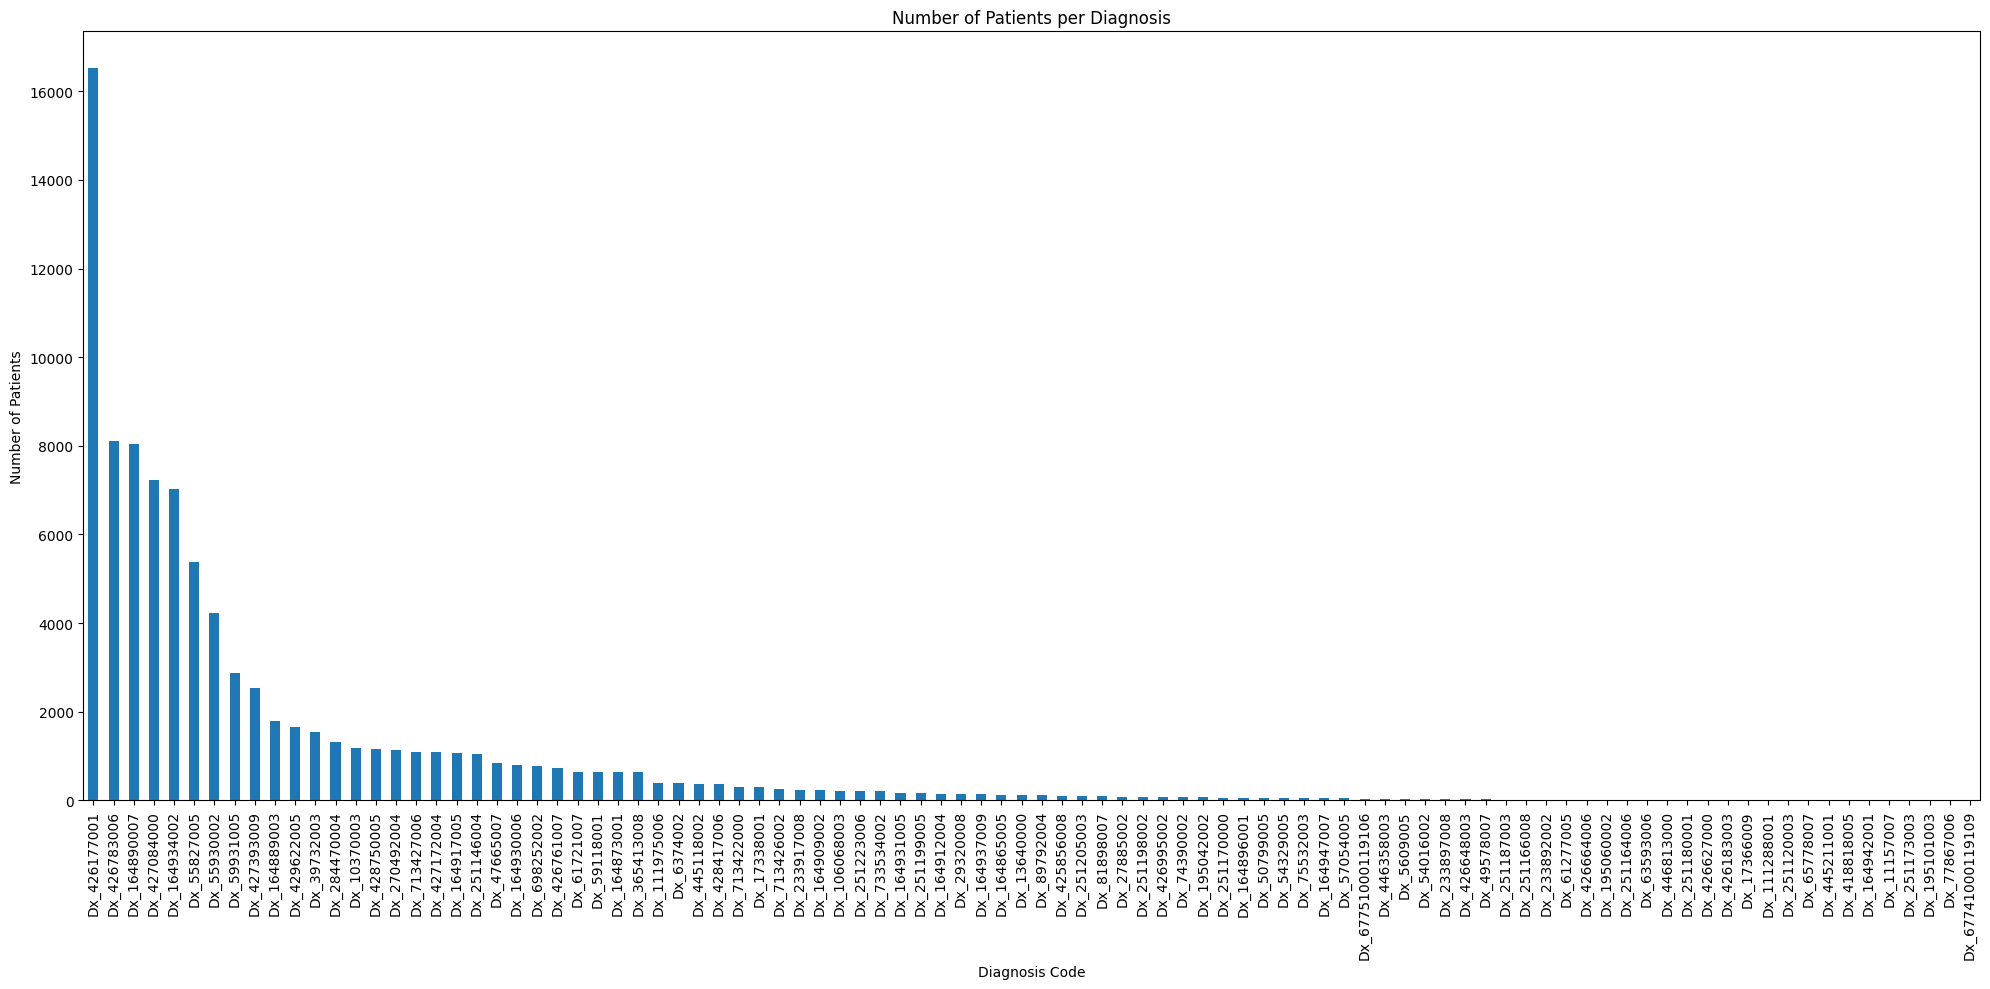

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# If not, load it first, e.g., df = pd.read_csv('your_file.csv')

# Drop the ID column to focus only on diagnosis columns
diagnosis_columns = df.columns.drop('ID')

# Count how many patients have each diagnosis (True values)
diagnosis_counts = df[diagnosis_columns].sum().sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(20, 10))
diagnosis_counts.plot(kind='bar')
plt.title('Number of Patients per Diagnosis')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Displaying Diseases only appearing in >=10% of patients

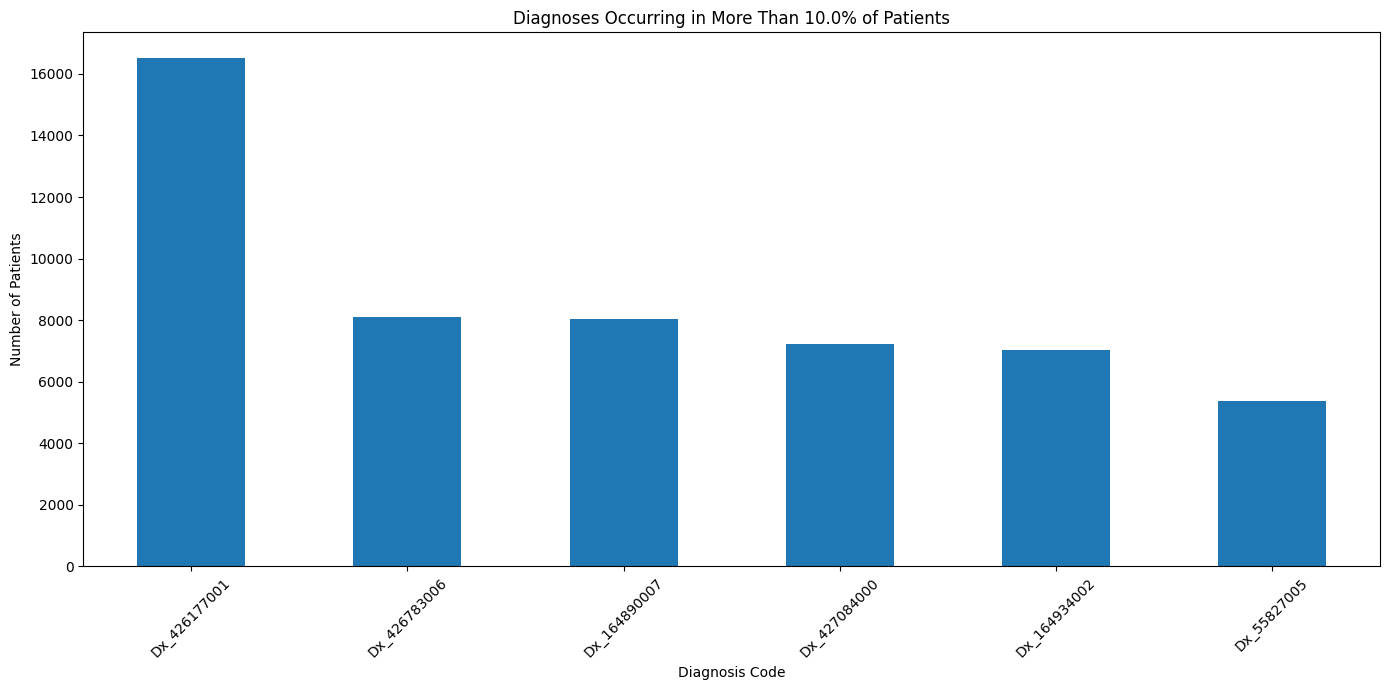

Dx_426177001    16525
Dx_426783006     8109
Dx_164890007     8046
Dx_427084000     7237
Dx_164934002     7036
Dx_55827005      5382
dtype: int64


In [22]:
import matplotlib.pyplot as plt

# Calculate total number of patients
total_patients = len(df)

# Set percentage threshold
percentage_threshold = 0.1 

# Convert percentage threshold into an absolute patient count
count_threshold = total_patients * percentage_threshold

# Filter diagnoses that have more than this number of patients
filtered_counts = diagnosis_counts[diagnosis_counts > count_threshold]

# Plot
plt.figure(figsize=(14, 7))
filtered_counts.plot(kind='bar')
plt.title(f'Diagnoses Occurring in More Than {percentage_threshold*100:.1f}% of Patients')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(filtered_counts)


In [23]:
# Diagnosis names (column names) that passed the threshold
selected_diagnoses = list(filtered_counts.index)

df_10 = df[['ID'] + list(filtered_counts.index)]
df_10.reset_index(inplace=True, drop=True)

display(df_10)
df_10.info()

,ID,Dx_426177001,Dx_426783006,Dx_164890007,Dx_427084000,Dx_164934002,Dx_55827005
0,JS00001,False,False,False,False,True,False
1,JS00002,True,False,False,False,True,False
2,JS00004,True,False,False,False,False,False
3,JS00005,False,False,True,False,False,False
4,JS00006,True,False,False,False,False,False
...,...,...,...,...,...,...,...
45050,JS45548,False,False,False,False,False,False
45051,JS45549,False,False,False,False,False,False
45052,JS45550,False,False,False,False,False,False
45053,JS45551,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45055 entries, 0 to 45054
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            45055 non-null  object
 1   Dx_426177001  45055 non-null  bool  
 2   Dx_426783006  45055 non-null  bool  
 3   Dx_164890007  45055 non-null  bool  
 4   Dx_427084000  45055 non-null  bool  
 5   Dx_164934002  45055 non-null  bool  
 6   Dx_55827005   45055 non-null  bool  
dtypes: bool(6), object(1)
memory usage: 616.1+ KB


In [24]:
# Identify diagnosis columns (excluding 'ID')
diagnosis_cols = df_10.columns.drop('ID')

# Keep only rows where at least one diagnosis is True
df_10_filtered = df_10[df_10[diagnosis_cols].any(axis=1)].reset_index(drop=True)

# Display info to verify
df_10_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41163 entries, 0 to 41162
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            41163 non-null  object
 1   Dx_426177001  41163 non-null  bool  
 2   Dx_426783006  41163 non-null  bool  
 3   Dx_164890007  41163 non-null  bool  
 4   Dx_427084000  41163 non-null  bool  
 5   Dx_164934002  41163 non-null  bool  
 6   Dx_55827005   41163 non-null  bool  
dtypes: bool(6), object(1)
memory usage: 562.9+ KB


In [25]:
df_10_filtered.to_csv('../data/diagnoses_10_filtered.csv', index=False)

## Displaying Diseases only appearing in >=1% of patients

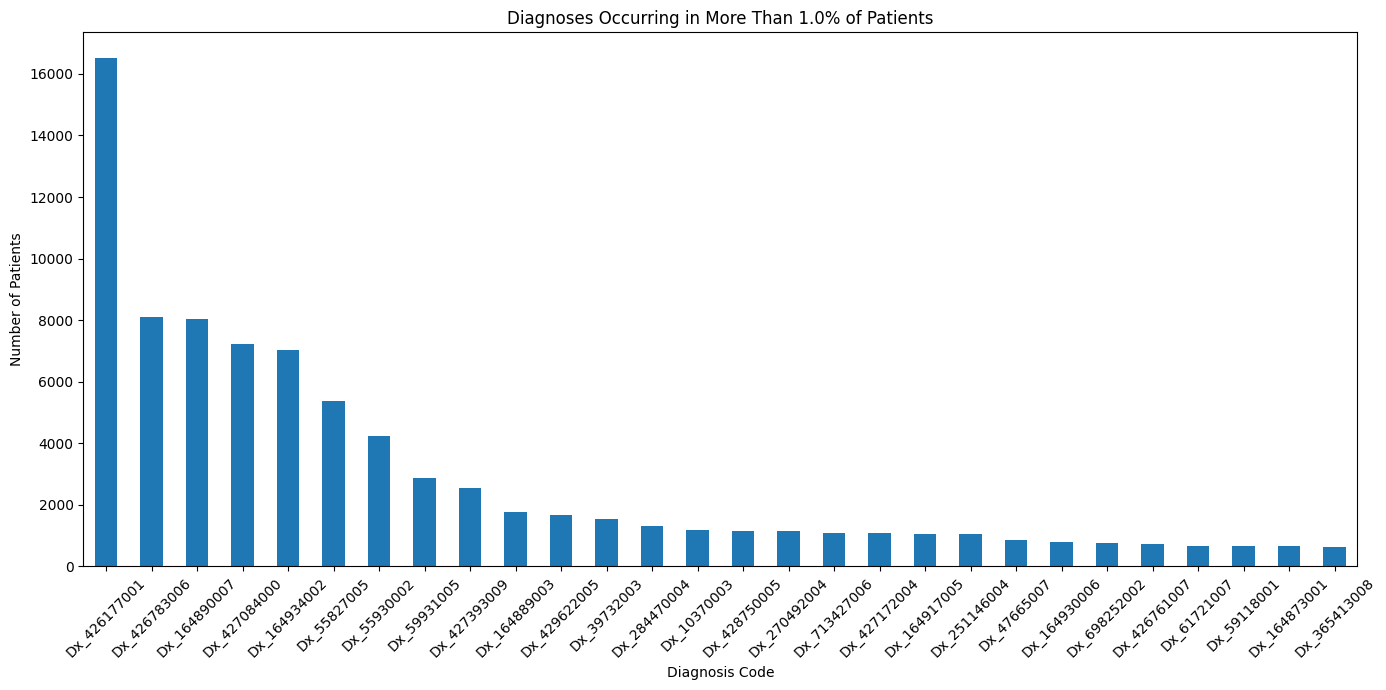

In [26]:
import matplotlib.pyplot as plt

# Calculate total number of patients
total_patients = len(df)

# Setpercentage threshold
percentage_threshold = 0.01  

# Convert percentage threshold into an absolute patient count
count_threshold = total_patients * percentage_threshold

# Filter diagnoses that have more than this number of patients
filtered_counts = diagnosis_counts[diagnosis_counts > count_threshold]

# Plot
plt.figure(figsize=(14, 7))
filtered_counts.plot(kind='bar')
plt.title(f'Diagnoses Occurring in More Than {percentage_threshold*100:.1f}% of Patients')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [27]:
# Diagnosis names (column names) that passed the threshold
selected_diagnoses = list(filtered_counts.index)

df_1 = df[['ID'] + list(filtered_counts.index)]
df_1.reset_index(inplace=True, drop=True)

display(df_1)
df_1.info()

,ID,Dx_426177001,Dx_426783006,Dx_164890007,Dx_427084000,Dx_164934002,Dx_55827005,Dx_55930002,Dx_59931005,Dx_427393009,...,Dx_164917005,Dx_251146004,Dx_47665007,Dx_164930006,Dx_698252002,Dx_426761007,Dx_61721007,Dx_59118001,Dx_164873001,Dx_365413008
0,JS00001,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,JS00002,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,JS00004,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,JS00005,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,JS00006,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45050,JS45548,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45051,JS45549,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45052,JS45550,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45053,JS45551,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45055 entries, 0 to 45054
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            45055 non-null  object
 1   Dx_426177001  45055 non-null  bool  
 2   Dx_426783006  45055 non-null  bool  
 3   Dx_164890007  45055 non-null  bool  
 4   Dx_427084000  45055 non-null  bool  
 5   Dx_164934002  45055 non-null  bool  
 6   Dx_55827005   45055 non-null  bool  
 7   Dx_55930002   45055 non-null  bool  
 8   Dx_59931005   45055 non-null  bool  
 9   Dx_427393009  45055 non-null  bool  
 10  Dx_164889003  45055 non-null  bool  
 11  Dx_429622005  45055 non-null  bool  
 12  Dx_39732003   45055 non-null  bool  
 13  Dx_284470004  45055 non-null  bool  
 14  Dx_10370003   45055 non-null  bool  
 15  Dx_428750005  45055 non-null  bool  
 16  Dx_270492004  45055 non-null  bool  
 17  Dx_713427006  45055 non-null  bool  
 18  Dx_427172004  45055 non-null  bool  
 19  Dx_1

## Move the DFs to new CSVs

In [28]:
df_1.to_csv('../data/diagnoses_1.csv', index=False)
df_10.to_csv('../data/diagnoses_10.csv', index=False)